In [13]:
import numpy as np
np.random.seed(42) # reproducibility

In [162]:
trees = np.random.randint(0,100,(5000,2)) # choose 5000 tree locations (assign fuel to half of cells)
fuel = np.zeros((100,100), dtype=np.uint8) # could be 1000x1000m
fuel[trees[:,0], trees[:,1]] = np.random.randint(0,255,5000)

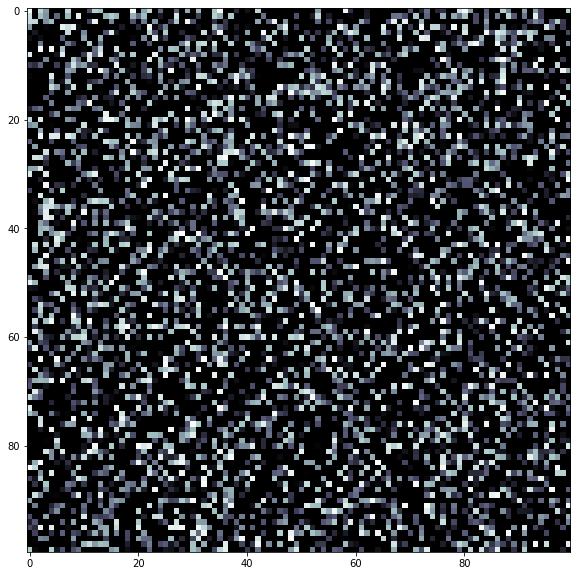

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(fuel, cmap='bone')
plt.show()

In [163]:
state = np.zeros_like(fuel)
state[state.shape[0]//2-1,state.shape[1]//2-1] = 1
state[state.shape[0]//2-1,state.shape[1]//2] = 1
state[state.shape[0]//2,state.shape[1]//2-1] = 1
state[state.shape[0]//2,state.shape[1]//2] = 1

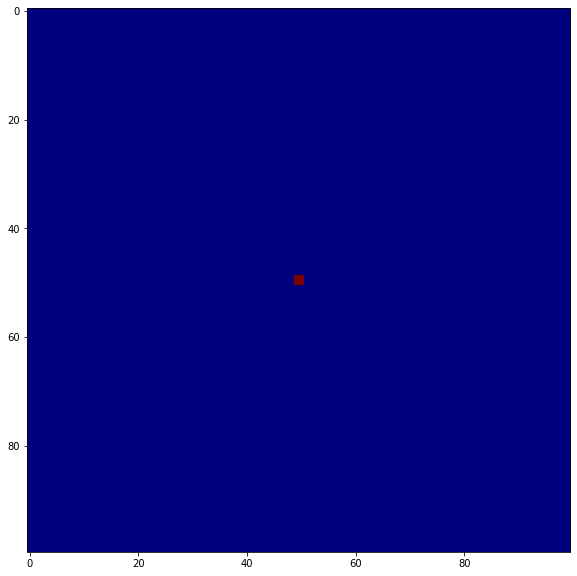

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(state, cmap='jet')
plt.show()

I will stack the matrices so I can apply filters

In [45]:
joint = np.stack([fuel,state], axis=0)

In [230]:
a = np.arange(100).reshape(10,10)

burn_rate = 100

def fuel_func(buffer):
    print(np.array(buffer).reshape(2,3,3))
    fuel = buffer[:9]
    state = buffer[9:]
    if state[4] == 1: # if cell is on fire
        fuel_new = max(fuel[4]-burn_rate,0)
    else: # intact cell
        fuel_new = fuel[4]
    fuel_new = np.random.randint(0,2)
    print('a')
    return 6

def state_func(buffer):
    fuel = buffer[:9]
    state = buffer[9:]
    if state[4] == 1: # if cell is on fire
        state_new = state[4] if fuel[4] > 0 else 0
    else:
        state_new = round(sum(state)*np.random.rand()) # 50% probability that it will ignite from one of the cells
    return state_new
    
from scipy.ndimage import generic_filter

In [167]:
nf = generic_filter(joint, fuel_func, size=(2,3,3))
ns = generic_filter(joint, state_func, size=(2,3,3))

In [243]:
arr = np.stack([np.random.randn(5,5), np.zeros((5,5))], axis=0)

In [244]:
generic_filter(arr, fuel_func, size=(2,3,3),mode='constant', cval=3, origin=[-1,0,0])

[[[ 3.          3.          3.        ]
  [ 3.          1.46677154  0.23981364]
  [ 3.         -0.47475808 -1.11703303]]

 [[ 3.          3.          3.        ]
  [ 3.          0.          0.        ]
  [ 3.          0.          0.        ]]]
a
[[[ 3.          3.          3.        ]
  [ 1.46677154  0.23981364  0.89062786]
  [-0.47475808 -1.11703303  0.09846256]]

 [[ 3.          3.          3.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
a
[[[ 3.          3.          3.        ]
  [ 0.23981364  0.89062786  0.3074908 ]
  [-1.11703303  0.09846256 -0.82454645]]

 [[ 3.          3.          3.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
a
[[[ 3.          3.          3.        ]
  [ 0.89062786  0.3074908   1.57290823]
  [ 0.09846256 -0.82454645 -0.78425939]]

 [[ 3.          3.          3.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]]
a
[[[ 3.          

array([[[6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.]],

       [[6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6.]]])

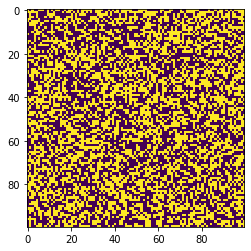

In [175]:
plt.imshow(nf[0])

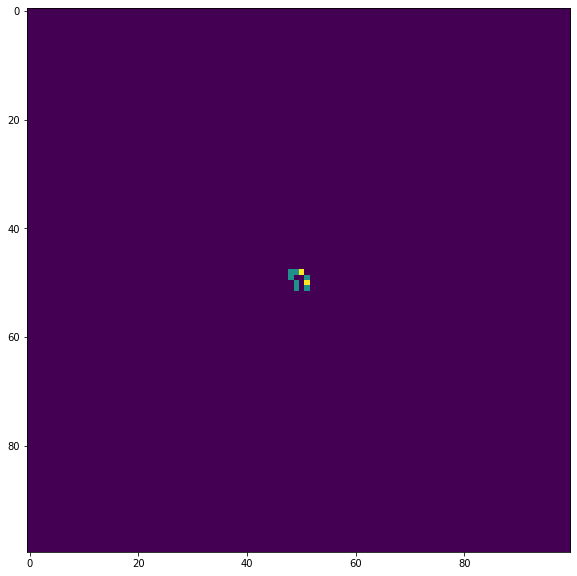

In [151]:
ns = generic_filter(joint, state_func, size=(2,3,3))
plt.figure(figsize=(10,10))
plt.imshow(ns[1])

In [245]:
np.max(ns[1])

2